In [32]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
con = sqlite3.connect('./zomato_rawdata.sqlite')

In [14]:
df = pd.read_sql_query("SELECT * FROM Users", con)

In [15]:
df.shape

(51717, 18)

In [18]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [26]:
df.isnull().sum()/len(df)*100 # Check for missing values as percentages

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [28]:
df['rate'].unique() # Check for what the unique values are

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [36]:
df['rate'].replace(('NEW', '-'), np.nan, inplace=True) # For values "new" and dashes, we need to make it not a number

In [38]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [40]:
# That's better - now we need to make the fractions work like decimals instead since the're string with slashes

In [77]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x)==str else x)

In [79]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [81]:
# Now let's work on the crosstab function, also known in excel as the pivot table
x = pd.crosstab(df['rate'], df['online_order'])

In [71]:
x

online_order,No,Yes
rate,,
1.8 /5,3,0
1.8/5,2,0
2.0 /5,7,0
2.0/5,4,0
2.1 /5,5,8
...,...,...
4.7/5,51,30
4.8 /5,23,20
4.8/5,11,12


<Axes: xlabel='rate'>

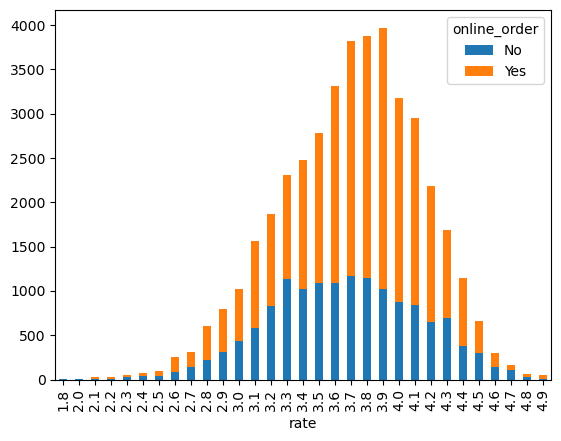

In [83]:
# Now we can make a chart
x.plot(kind='bar', stacked=True)

In [85]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


In [91]:
# Now let's make a stacked bar chart after a little math so we get the normalized values to equal 100% so we can see the relationship between rating and online orders
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [106]:
normalize_df = x.div(x.sum(axis=1).astype(float), axis=0)

In [108]:
normalize_df

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


In [110]:
# Now that we have our decimals all good, time for a chart
normalize_df*100.plot(kind='bar', stacked=True)

SyntaxError: invalid decimal literal (3747581250.py, line 2)